In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from numpy import pi
import missingno as msno
from yellowbrick.cluster import KElbowVisualizer
pd.options.display.max_columns = 200
pd.options.display.max_rows = 100


In [2]:
data_ord_1 = pd.read_csv('data_ord_1.csv')
data_ord_1

,customer_unique_id,n_achats,fright_value,price,total_price,n_article,recent,frequence
0,0000f46a3911fa3c0805444483337064,1,17.22,69.00,86.22,1.0,358,358.0
1,0000f6ccb0745a6a4b88665a16c9f078,1,17.63,25.99,43.62,1.0,142,142.0
2,0004aac84e0df4da2b147fca70cf8255,1,16.89,180.00,196.89,1.0,109,109.0
3,00053a61a98854899e70ed204dd4bafe,1,37.18,382.00,419.18,2.0,3,3.0
4,0005e1862207bf6ccc02e4228effd9a0,1,15.12,135.00,150.12,1.0,364,364.0
...,...,...,...,...,...,...,...,...
58240,fffbf87b7a1a6fa8b03f081c5f51a201,1,18.32,149.00,167.32,1.0,66,66.0
58241,fffcf5a5ff07b0908bd4e2dbc735a684,1,497.42,1570.00,2067.42,2.0,268,268.0
58242,fffea47cd6d3cc0a88bd621562a9d061,1,19.69,64.89,84.58,1.0,83,83.0
58243,ffff371b4d645b6ecea244b27531430a,1,22.56,89.90,112.46,1.0,389,389.0


In [3]:
data=data_ord_1[['n_achats','total_price','recent','frequence']]

In [4]:
from sklearn import preprocessing, cluster, metrics


In [5]:
data=data.dropna()

In [6]:
scaler=preprocessing.StandardScaler()
scaler.fit(data)
X_norm=scaler.transform(data)

In [7]:
cls=cluster.KMeans(n_clusters=2,init='random')
cls.fit(X_norm)
silh=metrics.silhouette_score(X_norm, cls.labels_)

In [8]:
silh

0.48467456168874523

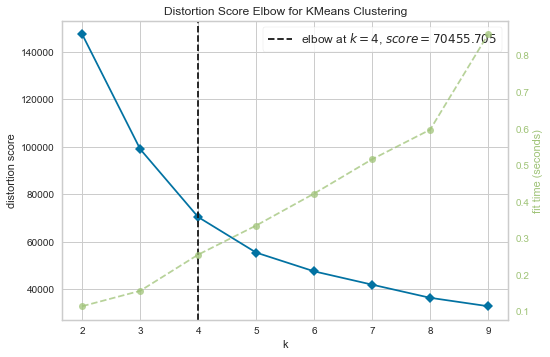

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_norm)        # Fit the data to the visualizer
visualizer.show()

In [10]:
silhouettes=[]
for k in range(2,10):
    cls=cluster.KMeans(n_clusters=k,init='random')
    cls.fit(X_norm)
    print(k)
    silh=metrics.silhouette_score(X_norm, cls.labels_)        #enregistrement des résultats 
    silhouettes.append(silh)
    print(k)
    

2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9


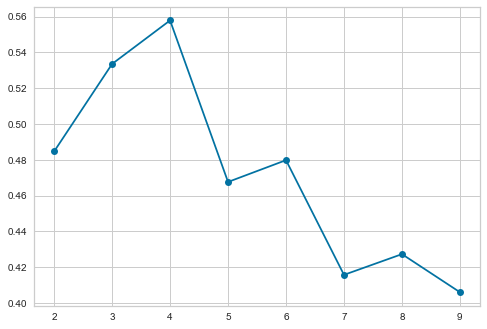

In [11]:
plt.plot(range(2,10),silhouettes, marker='o')

In [84]:
cls=cluster.KMeans(n_clusters=3,init='random')
cls.fit(X_norm)
cls3=cluster.KMeans(n_clusters=4,init='random')
cls3.fit(X_norm)

KMeans(init='random', n_clusters=4)

In [13]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
pca.fit(data)
print (pca.explained_variance_ratio_.cumsum())
X_trans=pca.transform(data)

[0.64801576 0.99836925]


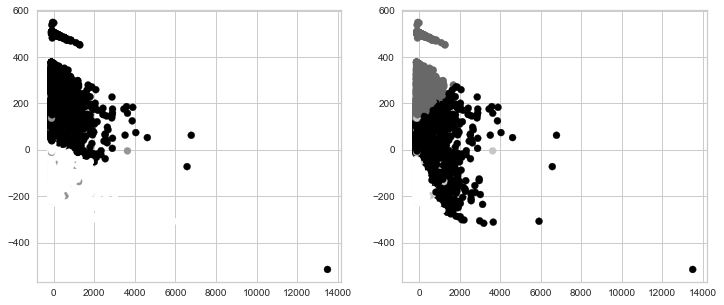

In [85]:
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(121)
ax.scatter(X_trans[:,0],X_trans[:,1], c=cls.labels_)
ax=fig.add_subplot(122)
ax.scatter(X_trans[:,0],X_trans[:,1], c=cls3.labels_)

In [86]:
data_1=data[['n_achats','total_price','recent','frequence']]
data_2=data[['n_achats','total_price','recent','frequence']]
data_1['label']=cls.labels_
data_2['label']=cls3.labels_

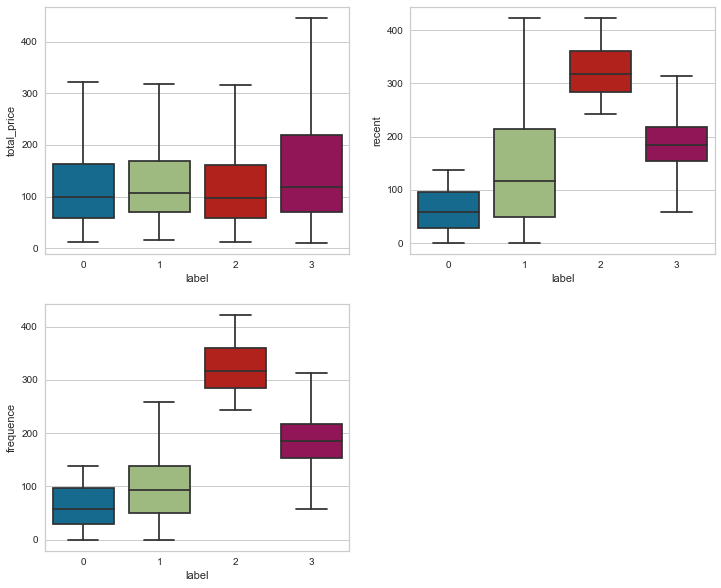

In [87]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(221)
ax = sns.boxplot(x="label", y="total_price", data=data_2, showfliers = False)
ax=fig.add_subplot(222)
ax = sns.boxplot(x="label", y="recent", data=data_2, showfliers = False)
ax=fig.add_subplot(223)
ax = sns.boxplot(x="label", y="frequence", data=data_2, showfliers = False)


In [17]:
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.50,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].drop('label').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)


In [18]:
df=data_2.groupby('label', as_index=False).agg(n_achats=('n_achats','mean'),
                                               total_price=('total_price','mean'),
                                               recent=('recent','mean'),
                                               frequence=('frequence','mean'))
for cat in ['n_achats','total_price','recent','frequence']:
    df[cat]=df[cat]/max(df[cat])
df

,label,n_achats,total_price,recent,frequence
0,0,0.474933,0.882542,0.184373,0.184373
1,1,1.000000,0.856244,0.427498,0.287041
2,2,0.474933,0.960042,0.571574,0.571574
3,3,0.474933,1.000000,1.000000,1.000000


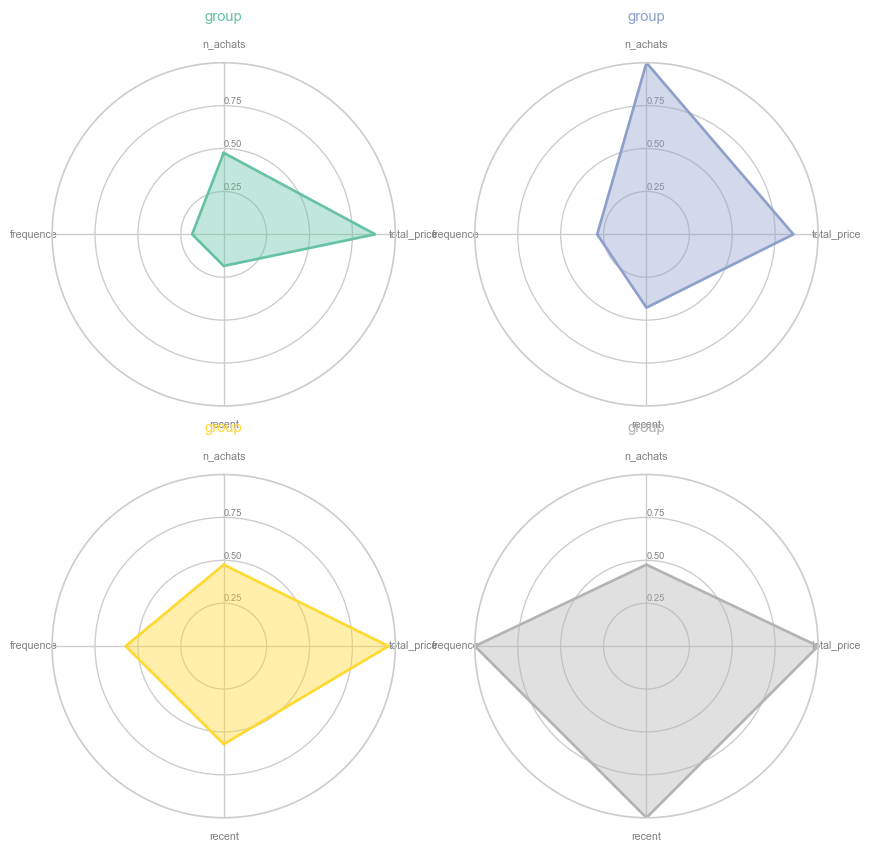

In [19]:
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group', color=my_palette(row))

For n_clusters = 2 The average silhouette_score is : 0.484663656648249
For n_clusters = 3 The average silhouette_score is : 0.5335463412824084
For n_clusters = 4 The average silhouette_score is : 0.5578722858643012


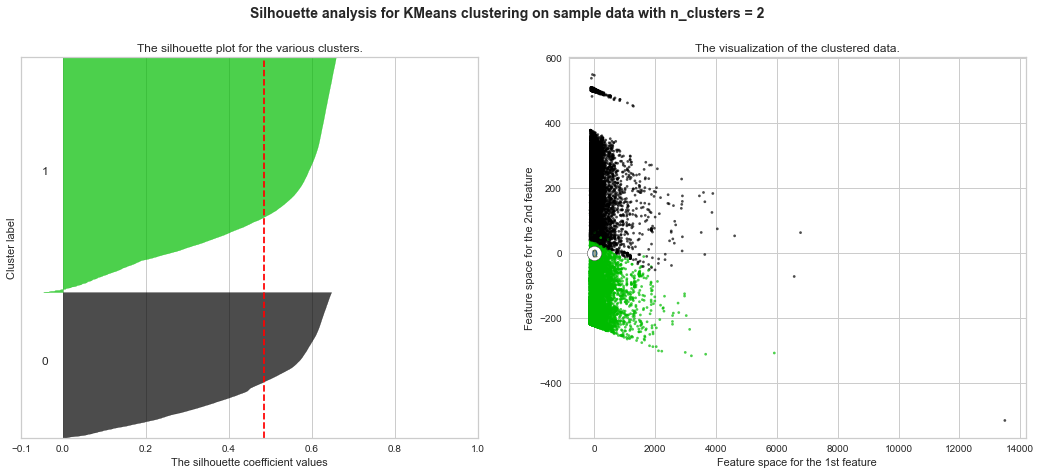

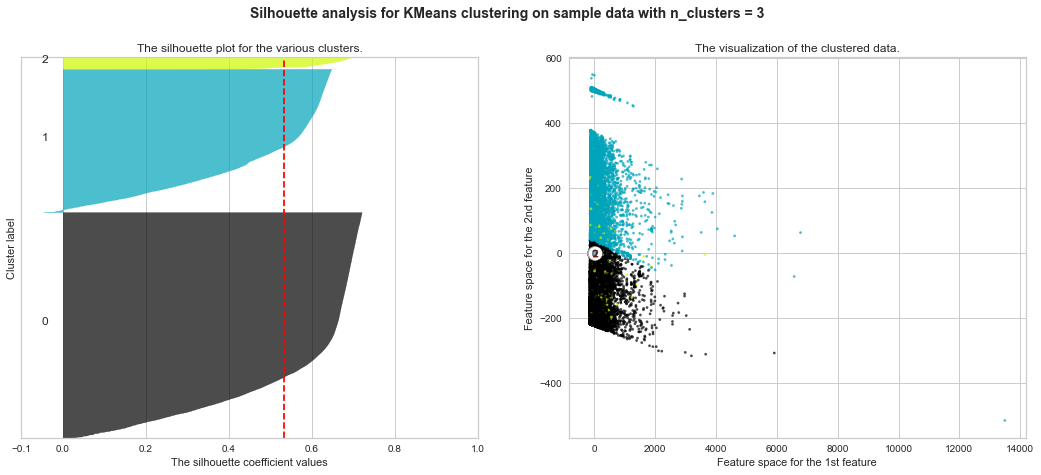

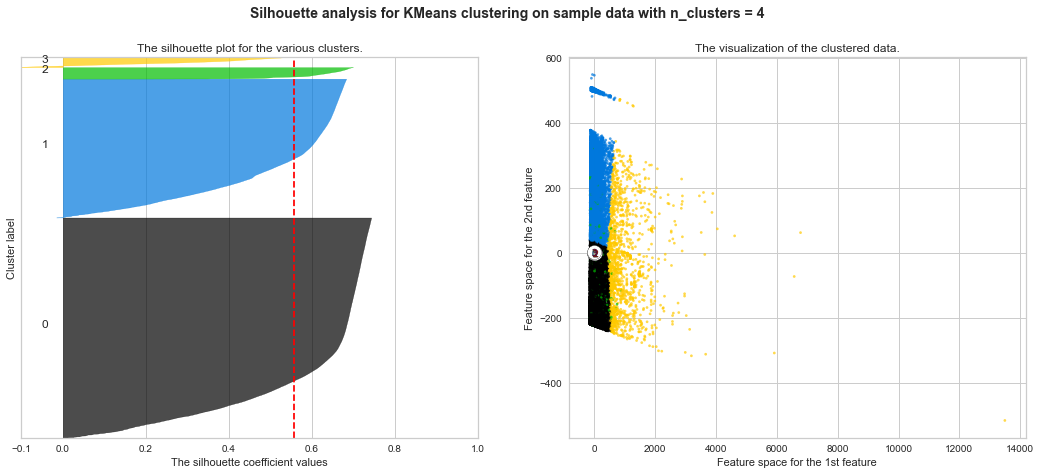

In [20]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_trans[:, 0], X_trans[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [21]:
data1=data_ord_1[['n_achats','recent','frequence','fright_value','price','total_price']]
data1

,n_achats,recent,frequence,fright_value,price,total_price
0,1,358,358.0,17.22,69.00,86.22
1,1,142,142.0,17.63,25.99,43.62
2,1,109,109.0,16.89,180.00,196.89
3,1,3,3.0,37.18,382.00,419.18
4,1,364,364.0,15.12,135.00,150.12
...,...,...,...,...,...,...
58240,1,66,66.0,18.32,149.00,167.32
58241,1,268,268.0,497.42,1570.00,2067.42
58242,1,83,83.0,19.69,64.89,84.58
58243,1,389,389.0,22.56,89.90,112.46


In [22]:
#data1=pd.concat([data1.drop(['order_st'],axis=1),pd.get_dummies(data1['order_st'])],axis=1)
#data1.drop(columns=['approved','created','invoiced','processing','shipped','unavailable','delivered'],inplace=True)
#data1

In [23]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data1 = pd.DataFrame(imputer.fit_transform(data1),columns = data1.columns)

In [24]:
data1

,n_achats,recent,frequence,fright_value,price,total_price
0,1.0,358.0,358.0,17.22,69.00,86.22
1,1.0,142.0,142.0,17.63,25.99,43.62
2,1.0,109.0,109.0,16.89,180.00,196.89
3,1.0,3.0,3.0,37.18,382.00,419.18
4,1.0,364.0,364.0,15.12,135.00,150.12
...,...,...,...,...,...,...
58240,1.0,66.0,66.0,18.32,149.00,167.32
58241,1.0,268.0,268.0,497.42,1570.00,2067.42
58242,1.0,83.0,83.0,19.69,64.89,84.58
58243,1.0,389.0,389.0,22.56,89.90,112.46


In [25]:
scaler.fit(data1)
X_norm1=scaler.transform(data1)
silhouettes=[]

2
3
4
5
6
7
8
9


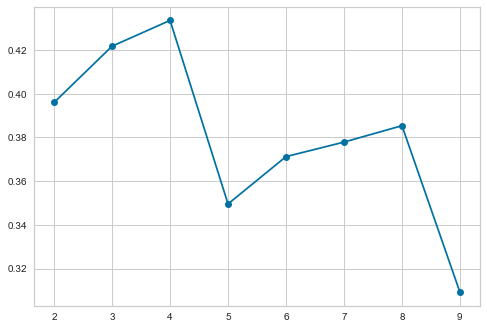

In [26]:

for k in range(2,10):
    cls=cluster.KMeans(n_clusters=k,init='random')
    cls.fit(X_norm1)
    silh=metrics.silhouette_score(X_norm1, cls.labels_)
    silhouettes.append(silh)
    print(k)



Text(0.5, 1.0, 'Silhouette score for N cluster')

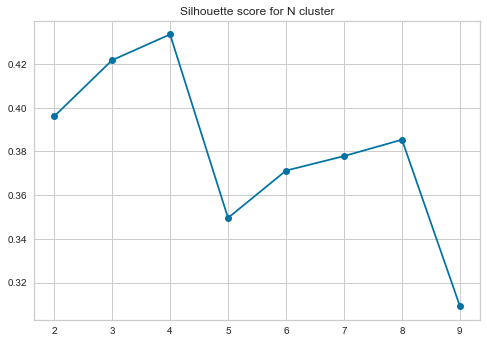

In [95]:
plt.plot(range(2,10),silhouettes, marker='o')
plt.title('Silhouette score for N cluster')

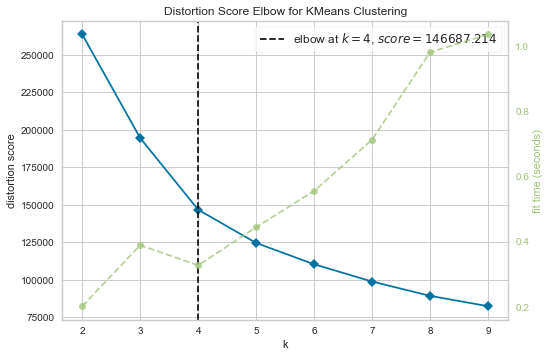

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_norm1)        # Fit the data to the visualizer
visualizer.show()

In [28]:
pca1=decomposition.PCA(n_components=2)
pca1.fit(data1)
print (pca1.explained_variance_ratio_.cumsum())
X_trans1=pca1.transform(data1)

[0.77608615 0.99510761]


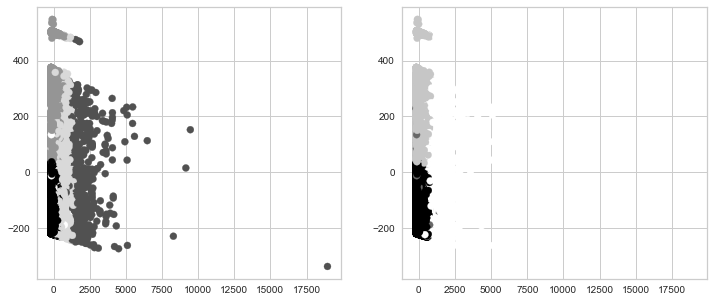

In [29]:
cls7=cluster.KMeans(n_clusters=5,init='random')
cls7.fit(X_norm1)
cls6=cluster.KMeans(n_clusters=4,init='random')
cls6.fit(X_norm1)
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(121)
ax.scatter(X_trans1[:,0],X_trans1[:,1], c=cls7.labels_)
ax=fig.add_subplot(122)
ax.scatter(X_trans1[:,0],X_trans1[:,1], c=cls6.labels_)


In [90]:
#data11=data1[['n_achats','recent','frequence','fright_value','price','n_article','canceled','delivered']]
data12=data1[['n_achats','recent','frequence','fright_value','price','total_price']]

#data11['label']=cls7.labels_
data12['label']=cls6.labels_
df=data12.groupby('label', as_index=False).agg(n_achats=('n_achats','mean'),
                                               recent=('recent','mean'),
                                               frequence=('frequence','mean'),
                                               #price=('price','mean'),
                                               #fright_value=('fright_value','mean'),
                                               total_price=('total_price','mean')
                                              )
for cat in ['n_achats','recent','frequence','total_price']:
    df[cat]=df[cat]/max(df[cat])
df

,label,n_achats,recent,frequence,total_price
0,0,0.477702,0.595517,0.594138,1.000000
1,1,0.474783,1.000000,1.000000,0.126066
2,2,1.000000,0.496852,0.333837,0.133562
3,3,0.474783,0.287848,0.287848,0.126862


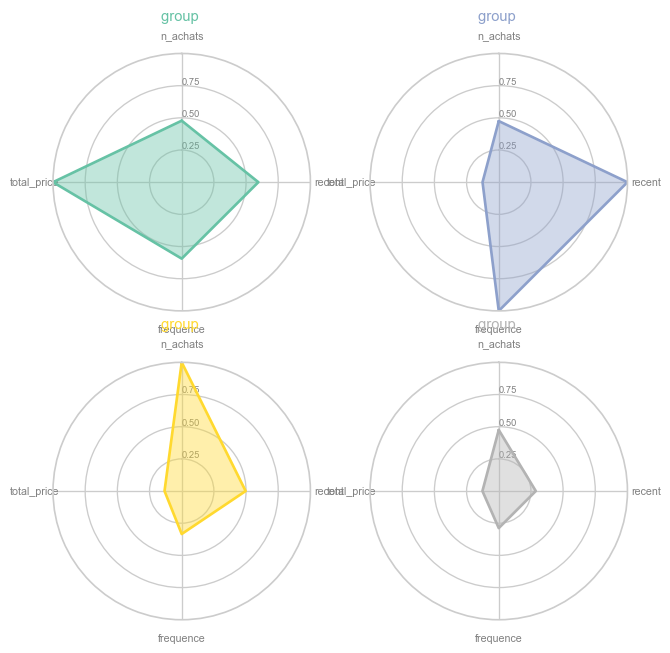

In [93]:
my_dpi=96
plt.figure(figsize=(750/my_dpi, 750/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, 4):
    make_spider( row=row, title='group ', color=my_palette(row))

For n_clusters = 4 The average silhouette_score is : 0.46508094383549275


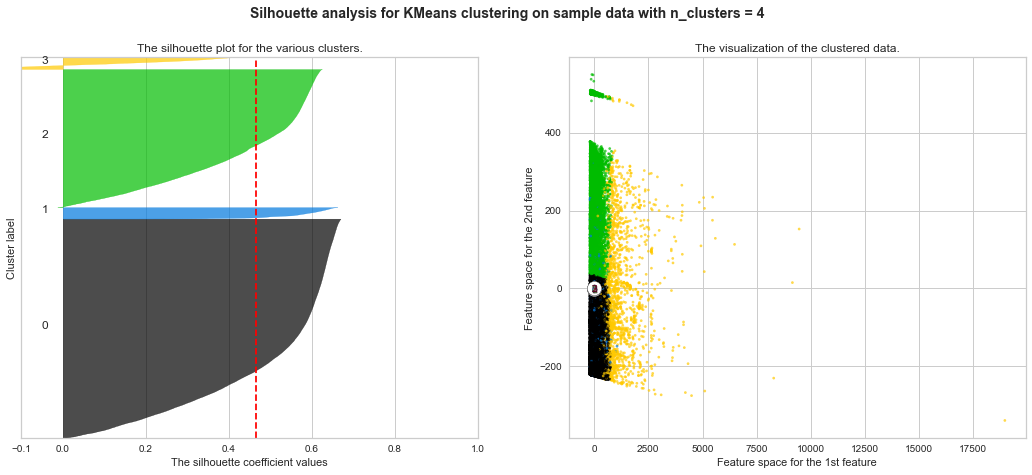

In [88]:
range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_norm1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_norm1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_trans1[:, 0], X_trans1[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [33]:
data12

,n_achats,recent,frequence,fright_value,price,total_price,label
0,1.0,358.0,358.0,17.22,69.00,86.22,1
1,1.0,142.0,142.0,17.63,25.99,43.62,3
2,1.0,109.0,109.0,16.89,180.00,196.89,3
3,1.0,3.0,3.0,37.18,382.00,419.18,3
4,1.0,364.0,364.0,15.12,135.00,150.12,1
...,...,...,...,...,...,...,...
58240,1.0,66.0,66.0,18.32,149.00,167.32,3
58241,1.0,268.0,268.0,497.42,1570.00,2067.42,0
58242,1.0,83.0,83.0,19.69,64.89,84.58,3
58243,1.0,389.0,389.0,22.56,89.90,112.46,1


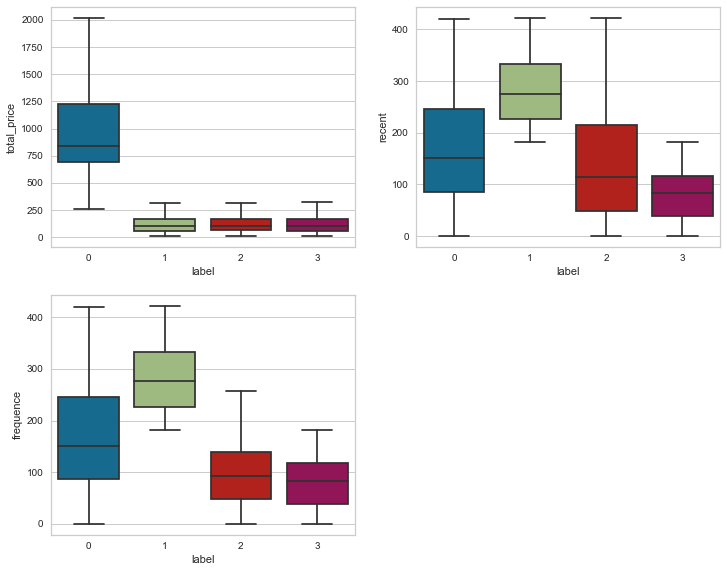

In [89]:
fig=plt.figure(figsize=(12,15))
ax=fig.add_subplot(321)
ax = sns.boxplot(x="label", y="total_price", data=data12, showfliers = False)
ax=fig.add_subplot(322)
ax = sns.boxplot(x="label", y="recent", data=data12, showfliers = False)
ax=fig.add_subplot(323)
ax = sns.boxplot(x="label", y="frequence", data=data12, showfliers = False)

In [35]:
X_norm

array([[-0.16238291, -0.33378672,  1.74869433,  1.76990602],
       [-0.16238291, -0.52957433, -0.14965373, -0.13805888],
       [-0.16238291,  0.17484742, -0.43967913, -0.42955352],
       ...,
       [-0.16238291, -0.34132408, -0.66818399, -0.65921596],
       [-0.16238291, -0.21318891,  2.02114243,  2.04373432],
       [-0.16238291, -0.40116339,  1.28289596,  1.30174796]])

0.8
0.8
0.8
0.8
0.8
0.9
0.9
0.9
0.9


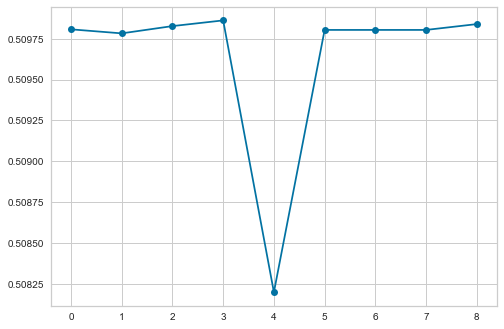

In [37]:
eps=[]
sample=[]
silhouette=[]
for k in np.arange(0.8,1.1,0.1):
    for samp in np.arange(8,15):
        clss=cluster.DBSCAN(eps=k, min_samples=samp) 
        clss.fit(X_norm)
        if (len(np.unique(clss.labels_))==5):
            print(k)
            eps.append(k)
            sample.append(samp)
            silhouette.append(metrics.silhouette_score(X_norm, clss.labels_))
plt.plot(range(0,len(silhouette)),silhouette, marker='o')

In [53]:
print(sample[3],eps[3])

13 0.8


In [54]:
clss=cluster.DBSCAN(eps=0.8, min_samples=13)
clss.fit(X_norm)

DBSCAN(eps=0.8, min_samples=13)

In [55]:
data13=data[['n_achats','recent','frequence','total_price']]
data13['label']=clss.labels_

/var/folders/rk/19mhn17506g7mynj9hbtw82h0000gn/T/ipykernel_2710/1552796128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data13['label']=clss.labels_


In [56]:
data13_class=data13.groupby('label', as_index=False).agg(count=('n_achats','count'))
data13_class.drop(data13_class.index[0], inplace=True)
data13_class

,label,count
1,0,56109
2,1,313
3,2,1612
4,3,106


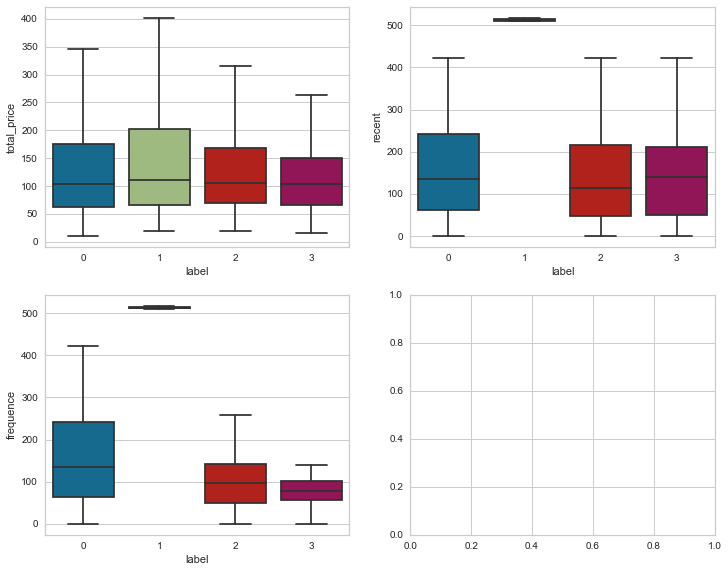

In [57]:
fig=plt.figure(figsize=(12,15))
data13=data13[data13['label']!=-1]
ax=fig.add_subplot(321)
ax = sns.boxplot(x="label", y="total_price", data=data13, showfliers = False)
ax=fig.add_subplot(322)
ax = sns.boxplot(x="label", y="recent", data=data13, showfliers = False)
ax=fig.add_subplot(323)
ax = sns.boxplot(x="label", y="frequence", data=data13, showfliers = False)
ax=fig.add_subplot(324)

In [58]:
silh=metrics.silhouette_score(X_norm, clss.labels_)

In [59]:
silh

0.5098626100166376

In [60]:
clsa=cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [74]:
data00=data.sample(10000)
scaler.fit(data)
X_no=scaler.transform(data00)

In [75]:
clsa.fit(X_no)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [71]:
clsa.labels_

array([8426, 5301, 9483, ...,    3,    1,    0])

In [72]:

from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



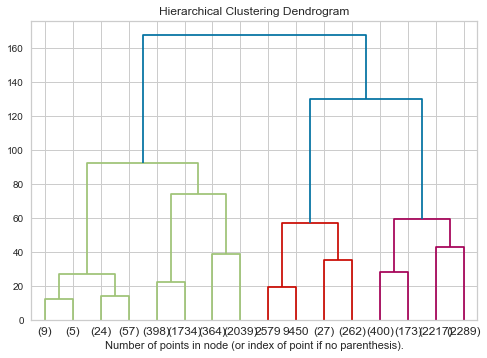

In [76]:

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clsa, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [78]:
clsa=cluster.AgglomerativeClustering(n_clusters=4)
clsa.fit(X_no)

AgglomerativeClustering(n_clusters=4)

/var/folders/rk/19mhn17506g7mynj9hbtw82h0000gn/T/ipykernel_2710/1174548906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data10['label']=clsa.labels_


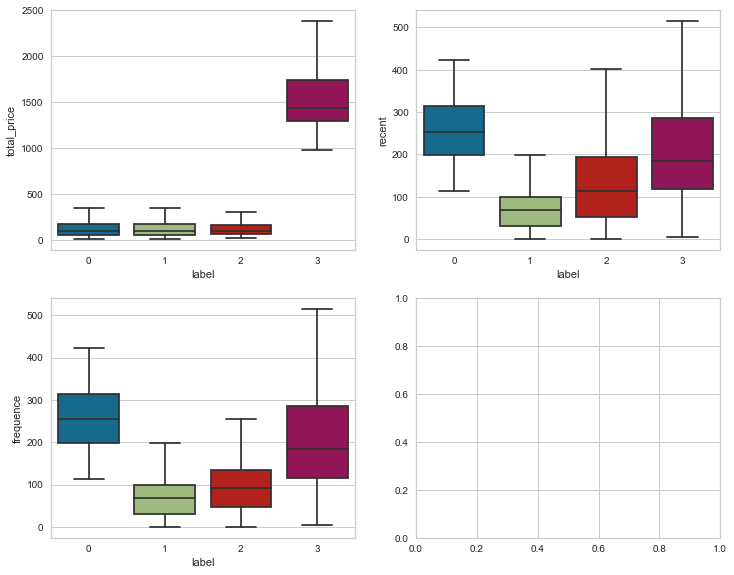

In [80]:
data10=data00[['n_achats','recent','frequence','total_price']]
data10['label']=clsa.labels_

fig=plt.figure(figsize=(12,15))
ax=fig.add_subplot(321)
ax = sns.boxplot(x="label", y="total_price", data=data10, showfliers = False)
ax=fig.add_subplot(322)
ax = sns.boxplot(x="label", y="recent", data=data10, showfliers = False)
ax=fig.add_subplot(323)
ax = sns.boxplot(x="label", y="frequence", data=data10, showfliers = False)
ax=fig.add_subplot(324)